In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Import Keras libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical


###### Tensorflow-GPU ########
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if physical_devices:  # Check if the list is not empty
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU devices found.")

import re



/Users/pascal-maker/pascalworkspace/env/lib/python3.10/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


IndexError: list index out of range

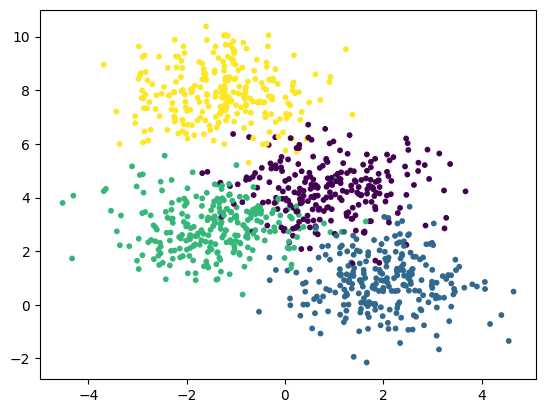

In [3]:
# Data generation (4 classes)

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=4, center_box = (-10,10),
                  random_state=0, cluster_std=1)
plt.scatter(X[:, 0], X[:, 1], s=10,c=y);

In [4]:
# Split into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)

# ---------------------------------------------------
# Normalization

#scaler = StandardScaler()

#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

#----------------------------------------------------
# one-hot encoding of the targets
y_train = to_categorical(y_train)
print(y_train)

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [6]:
# NN parameters

batch_size = 10
epochs = 100
dropoutrate = 0.1 #10%
input_dim = X_train.shape[1]
activation_hidden = 'relu' # Activation function of the hidden layer neurons
activation_output = 'softmax'# Activation function of the output layer neurons
initializer = 'RandomUniform' # Weight initializer
SGD = tf.keras.optimizers.SGD(learning_rate=0.1)
adam = tf.keras.optimizers.Adam()

model = Sequential()
model.add(Dense(1000, input_dim=input_dim, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(1000, kernel_initializer=initializer,activation=activation_hidden))
model.add(Dropout(dropoutrate))
model.add(Dense(y_train.shape[1], kernel_initializer=initializer,activation=activation_output))


model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=['accuracy'])

# train the model

history = model.fit(X_train, y_train, validation_split=0.3,epochs=epochs, verbose=1,batch_size=batch_size)

I0000 00:00:1758872608.400170    1471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758872608.400305    1471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758872608.400384    1471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758872610.133526    1471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1758872610.133618    1471 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-26

Epoch 1/100


I0000 00:00:1758872612.716950    1583 service.cc:146] XLA service 0x7f0f68004880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758872612.717018    1583 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
2025-09-26 09:43:32.769075: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-09-26 09:43:33.025685: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


19/56 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4484 - loss: 1.1472

I0000 00:00:1758872616.076279    1583 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.5631 - loss: 0.9966 - val_accuracy: 0.8167 - val_loss: 0.6145
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8025 - loss: 0.6439 - val_accuracy: 0.8417 - val_loss: 0.5850
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8478 - loss: 0.4593 - val_accuracy: 0.8833 - val_loss: 0.3499
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9021 - loss: 0.3175 - val_accuracy: 0.9125 - val_loss: 0.2597
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9188 - loss: 0.2426 - val_accuracy: 0.9125 - val_loss: 0.2244
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9136 - loss: 0.2406 - val_accuracy: 0.8917 - val_loss: 0.2806
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8665 - loss: 0.3650 - val_accuracy: 0.8833 - val_loss: 0.3943
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9233 - loss: 0.2889 - val_accuracy: 0.9375 - val_loss:

In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │         3,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1000)           │     1,001,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         4,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033,014 (45.90 MB)

 Trainable params: 4,011,004 (15.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,022,010 (30.60 MB)

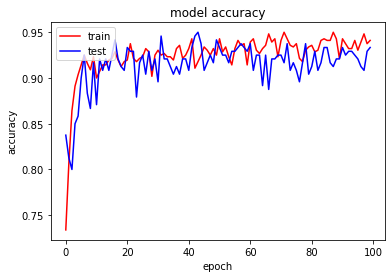

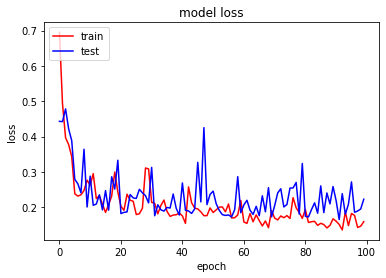

In [6]:
# Plot history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


2025-09-26 09:44:59.518257: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_22', 160 bytes spill stores, 160 bytes spill loads

2025-09-26 09:45:00.015984: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_50', 160 bytes spill stores, 160 bytes spill loads



172/172 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step


(-4.14847939486199, 12.251520605138023)

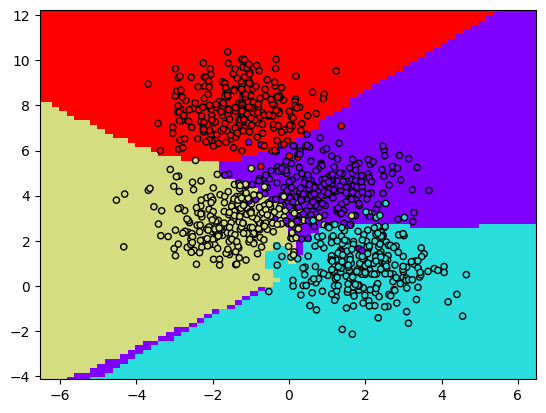

In [ ]:
# Plot of the decision boundary

# Step size for the mesh grid
h = 0.2

# Define the range for the first feature (x1) with some padding
x1_min = X[:, 0].min() - 2
x1_max = X[:, 0].max() + 2

# Define the range for the second feature (x2) with some padding
x2_min = X[:, 1].min() - 2
x2_max = X[:, 1].max() + 2

# Create a mesh grid for the feature space
# The grid will cover the range of x1 and x2 with a step size of `h`
xx, yy = np.meshgrid(
    np.arange(x1_min, x1_max, h),
    np.arange(x2_min, x2_max, h)
)

# Flatten the mesh grid and stack the coordinates into a 2D array
xy = np.vstack([xx.ravel(), yy.ravel()]).T

# Use the mesh grid points as input for predictions
xys = xy
# Uncomment the following line if scaling is required for the input data
# xys = scaler.transform(xy)

# Predict the class for each point in the mesh grid
# `model.predict(xys)` returns probabilities for each class
# `np.argmax(..., axis=-1)` selects the class with the highest probability
# Reshape the predictions to match the shape of the mesh grid
Zn = np.argmax(model.predict(xys), axis=-1).reshape(xx.shape)

# Plot the decision boundary using a color map
# `plt.pcolormesh` fills the grid with colors based on the predicted classes
plt.pcolormesh(xx, yy, Zn, cmap='rainbow')

# Overlay the original data points on the plot
# `X[:, 0]` and `X[:, 1]` are the feature values
# `c=y` colors the points based on their true class labels
# `edgecolor='k'` adds a black border around the points
# `s=20` sets the size of the points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=20, cmap='rainbow')

# Set the x-axis limits to match the mesh grid
plt.xlim(xx.min(), xx.max())

# Set the y-axis limits to match the mesh grid
plt.ylim(yy.min(), yy.max())

In [10]:
# Testing

y_pred = np.argmax(model.predict(X_test),axis=-1)
print('\n')
print(classification_report(y_test, y_pred))

cf = confusion_matrix(y_test, y_pred)

print(cf)
print(accuracy_score(y_test, y_pred) * 100) 

7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 444ms/step


              precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.96      0.98      0.97        51
           2       0.89      0.88      0.88        48
           3       1.00      0.95      0.97        57

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200

[[37  2  5  0]
 [ 1 50  0  0]
 [ 6  0 42  0]
 [ 3  0  0 54]]
91.5
